In [3]:
# 科学计算模块
import numpy as np
import pandas as pd

# 绘图模块
import matplotlib as mpl
import matplotlib.pyplot as plt

# 自定义模块
from ML_basic_function import *

### 创建分类数据集生成器

#### 手动创建分类数据

In [4]:
# 创建初始标记值
num_inputs = 2               # 数据集特征
num_examples = 500           # 每一类样本数

In [5]:
# 创建两类正态分布数据
np.random.seed(24)
data0 = np.random.normal(4, 2, size=(num_examples, num_inputs))
data1 = np.random.normal(-2, 2, size=(num_examples, num_inputs))
data0[:10]

array([[6.65842435, 2.4599331 ],
       [3.36743928, 2.01837923],
       [1.85836749, 1.12257344],
       [5.1288337 , 4.59144378],
       [0.74719153, 4.4391304 ],
       [5.3576096 , 7.77854546],
       [5.9230768 , 4.20802239],
       [3.03766937, 5.70045706],
       [6.90684933, 6.11547487],
       [4.33112321, 5.03003676]])

In [6]:
print(data0.mean())
print(data0.std())
print(data0.mean(axis=0)) # 围绕着均值4波动
print(data0.std(axis=0)) # 标准差2

4.027189146259833
2.026404030444323
[3.90407794 4.15030035]
[2.05961619 1.98501764]


In [7]:
# 希望对二维数组中的每一列进行均值和标准差进行单独设置
a = np.random.normal([0, 5], [1, 3], size=(num_examples, num_inputs))
a[:10]

array([[ 0.96604603, 10.29870078],
       [ 0.57852053,  0.97914727],
       [-0.54625943,  6.62189346],
       [ 1.17934488, -2.31774452],
       [-0.56712052,  5.47539835],
       [ 0.23258861,  9.63743729],
       [ 1.0491485 ,  3.12586874],
       [-0.03904771,  4.66632328],
       [-1.15375907,  0.28192841],
       [ 0.40636534,  9.11768052]])

In [8]:
print(a.mean(axis=0))
print(a.std(axis=0))

[-0.04871211  4.98729846]
[0.97824254 2.85471431]


In [9]:
label0 = np.zeros(500)
label1 = np.ones(500)

In [10]:
features = np.concatenate((data0, data1), 0)
labels = np.concatenate((label0, label1), 0)
features.shape, labels.shape

((1000, 2), (1000,))

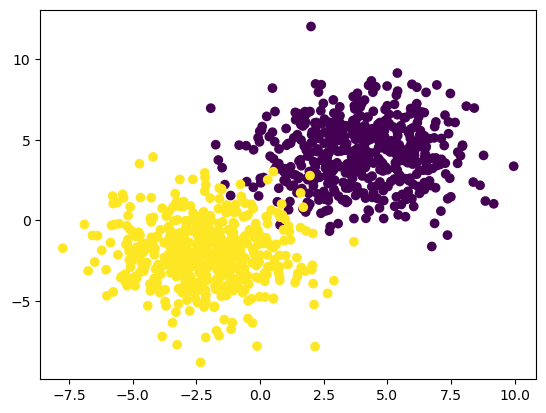

In [11]:
plt.scatter(features[:, 0], features[:, 1], c = labels)

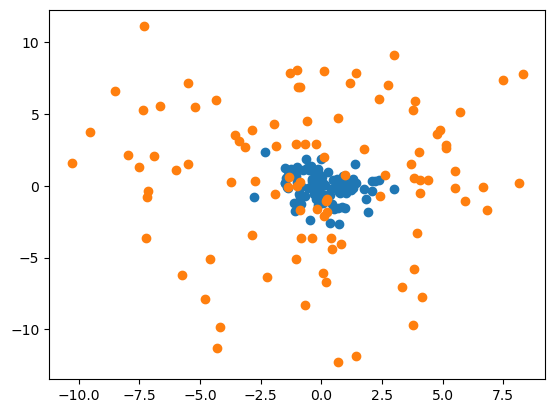

In [12]:
a1 = np.random.normal(0, 1, size=(100, 2))
a2 = np.random.normal(0, 5, size=(100, 2))
plt.scatter(a1[:, 0], a1[:, 1])
plt.scatter(a2[:, 0], a2[:, 1])

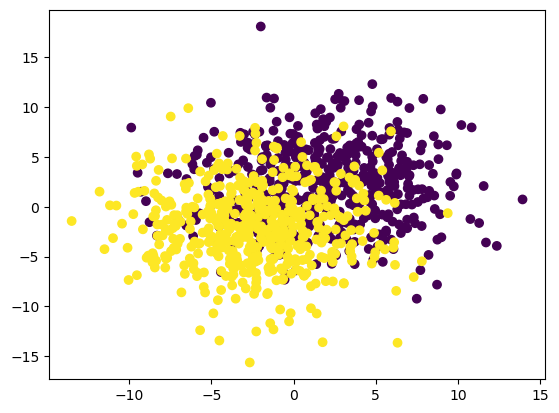

In [13]:
np.random.seed(24)
data0 = np.random.normal(2, 4, size=(num_examples, num_inputs))
data1 = np.random.normal(-2, 4, size=(num_examples, num_inputs))

features = np.concatenate((data0, data1), 0)
labels = np.concatenate((label0, label1), 0)

plt.scatter(features[:, 0], features[:, 1], c = labels)

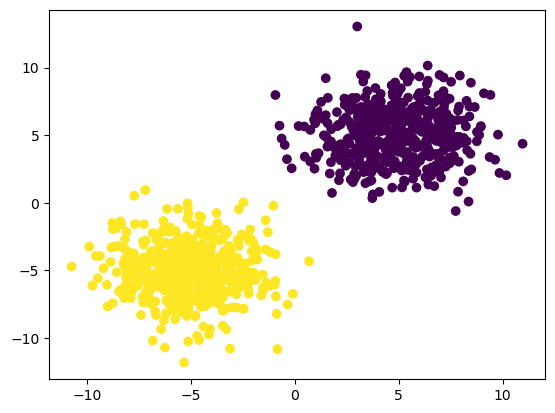

In [14]:
np.random.seed(24)
data0 = np.random.normal(5, 2, size=(num_examples, num_inputs))
data1 = np.random.normal(-5, 2, size=(num_examples, num_inputs))

features = np.concatenate((data0, data1), 0)
labels = np.concatenate((label0, label1), 0)

plt.scatter(features[:, 0], features[:, 1], c = labels)

#### 创建分类数据生成器

In [47]:
def arrayGenCla(num_examples = 500,
                num_inputs = 2,
                num_class = 3,
                deg_dispersion = [4, 2],
                bias = False):
    """分类数据集创建函数。

    :param num_examples: 每个类别的数据数量
    :param num_inputs: 数据集特征数量
    :param num_class：数据集标签类别总数
    :param deg_dispersion：数据分布离散程度参数，需要输入一个列表，其中第一个参数表示每个类别数组均值的参考、第二个参数表示随机数组标准差。
    :param bias：建立模型逻辑回归模型时是否带入截距，为True时将添加一列取值全为1的列
    :return: 生成的特征张量和标签张量，其中特征张量是浮点型二维数组，标签张量是长正型二维数组。
    """

    cluster_l = np.empty([num_examples, 1])      # 每一类标签数组的形状
    mean_ = deg_dispersion[0]                    # 每一类特征数组的均值的参考值
    std_ = deg_dispersion[1]                     # 每一类特征数组的方差
    lf = []                                      # 用于存储每一类特征的列表容器
    ll = []                                      # 用于存储每一类标签的列表容器
    k = mean_ * (num_class-1) / 2                # 每一类特征均值的惩罚因子

    for i in range(num_class):
        # i*mean_ - k = mean_ * (i - (num_class-1)/2) 表示每一类特征的均值(都围绕0对称分布)
        data_temp = np.random.normal(i*mean_-k, std_, size=(num_examples, num_inputs))     # 生成每一类特征
        lf.append(data_temp)                                                               # 将每一类特征添加到lf中
        labels_temp = np.full_like(cluster_l, i)                                           # 生成某一类的标签
        ll.append(labels_temp)                                                             # 将每一类标签添加到ll中

    features = np.concatenate(lf)
    labels = np.concatenate(ll)

    if bias == True:
        features = np.concatenate((features, np.ones(labels.shape)), 1)    # 在特征张量中添加一列全是1的列
    return features, labels

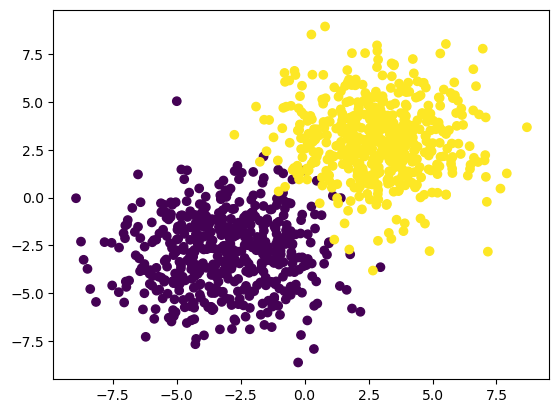

In [ ]:
# 设置随机数种子
np.random.seed(24)

# 创建数据
f, l = arrayGenCla(num_class = 3, deg_dispersion = [6, 2], bias = True)          # 离散程度较小

# 绘图展示
plt.scatter(f[:, 0], f[:, 1], c = l)

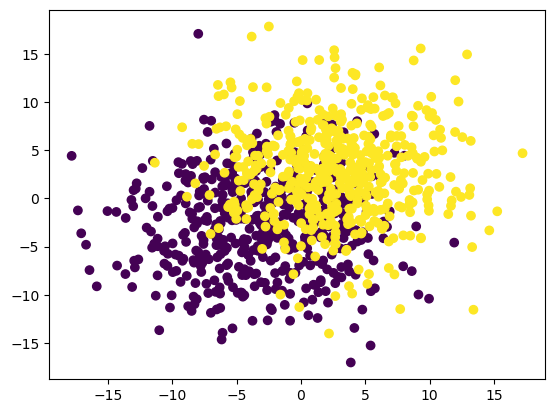

In [17]:
# 设置随机数种子
np.random.seed(24)

# 创建数据
# 离散程度较大
f, l = arrayGenCla(num_class = 2, deg_dispersion = [6, 5], bias = True)

# 绘图展示
plt.scatter(f[:, 0], f[:, 1], c = l)

### 逻辑回归的手动实现

- 数据准备

In [18]:
# 设置随机数种子
np.random.seed(24)

# 创建数据
f, l = arrayGenCla(num_class = 2, deg_dispersion = [6, 2], bias = True)

In [19]:
# 设置随机数种子
np.random.seed(24)

# 数据切分
Xtrain, Xtest, ytrain, ytest = array_split(f, l)

In [20]:
Xtrain[:5]

array([[-1.8548796 , -2.70483481,  1.        ],
       [-1.87637683, -2.41926232,  1.        ],
       [ 1.94989069,  4.23222036,  1.        ],
       [-1.06590498, -2.25297487,  1.        ],
       [-3.14343607, -3.97279361,  1.        ]])

In [21]:
mean_ = Xtrain[:, :-1].mean(axis=0)
std_ = Xtrain[:, :-1].std(axis=0)

Xtrain[:, :-1] = (Xtrain[:, :-1] - mean_) / std_
Xtest[:, :-1] = (Xtest[:, :-1] - mean_) / std_

In [22]:
Xtrain[:5]

array([[-0.54046519, -0.81824522,  1.        ],
       [-0.54654998, -0.73750376,  1.        ],
       [ 0.53647537,  1.14310619,  1.        ],
       [-0.31714585, -0.6904884 ,  1.        ],
       [-0.90519121, -1.17674213,  1.        ]])

Text(0.5, 1.0, 'Test set')

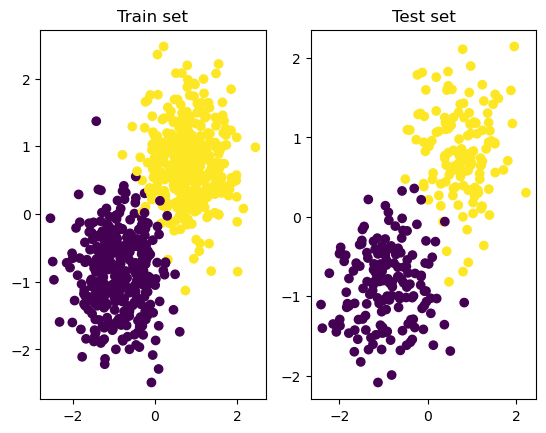

In [23]:
# 绘图展示
plt.subplot(121)
plt.scatter(Xtrain[:, 0], Xtrain[:, 1], c = ytrain)
plt.title('Train set')
plt.subplot(122)
plt.scatter(Xtest[:, 0], Xtest[:, 1], c = ytest)
plt.title('Test set')

- 初始化参数与超参数设置

In [24]:
# 设置随机数种子
np.random.seed(24)

# 参数初始值
n = f.shape[1]
w = np.random.randn(n, 1)
print(w)

# 核心参数
batch_size = 50
num_epoch = 200
lr_init = 0.2

# 学习率衰减参数（定义匿名函数）
lr_lambda = lambda epoch: 0.95 ** epoch

[[ 1.32921217]
 [-0.77003345]
 [-0.31628036]]


- 模型训练

In [25]:
w

array([[ 1.32921217],
       [-0.77003345],
       [-0.31628036]])

In [26]:
for i in range(num_epoch):
    w = sgd_cal(Xtrain, w, ytrain, logit_gd, batch_size=batch_size, epoch=1, lr=lr_init*lr_lambda(i))

In [27]:
w

array([[3.1894049 ],
       [2.30553244],
       [0.1691708 ]])

- 绘制图像

In [28]:
# TO-DO: 绘制图像

- 模型结果测试

In [29]:
yhat = sigmoid(Xtrain.dot(w))
yhat[:5]

array([[0.03103592],
       [0.03646214],
       [0.9891821 ],
       [0.08059581],
       [0.0043602 ]])

In [30]:
logit_cla(yhat, thr=0.5)[:5]

array([[0.],
       [0.],
       [1.],
       [0.],
       [0.]])

In [31]:
# 隐式转换：布尔型转换为数值型
(logit_cla(yhat, thr=0.5) == ytrain).mean()

np.float64(0.9871428571428571)

In [32]:
def logit_acc(X, w, y, thr=0.5):
    yhat = sigmoid(X.dot(w))
    y_cal = logit_cla(yhat, thr=thr)
    return (y_cal == y).mean()

In [33]:
# 训练集准确率
logit_acc(Xtrain, w, ytrain)

np.float64(0.9871428571428571)

In [34]:
# 测试集准确率
logit_acc(Xtest, w, ytest)

np.float64(0.98)

- 模型准确率变化曲线

In [35]:
# 设置随机数种子
np.random.seed(24)

# 参数初始值
n = f.shape[1]
w = np.random.randn(n, 1)

# 记录迭代过程模型准确率计算结果
train_acc = []
test_acc = []

for i in range(num_epoch):
    w = sgd_cal(Xtrain, w, ytrain, logit_gd, batch_size=batch_size, epoch=1, lr=lr_init*lr_lambda(i))
    train_acc.append(logit_acc(Xtrain, w, ytrain, thr=0.5))
    test_acc.append(logit_acc(Xtest, w, ytest, thr=0.5))

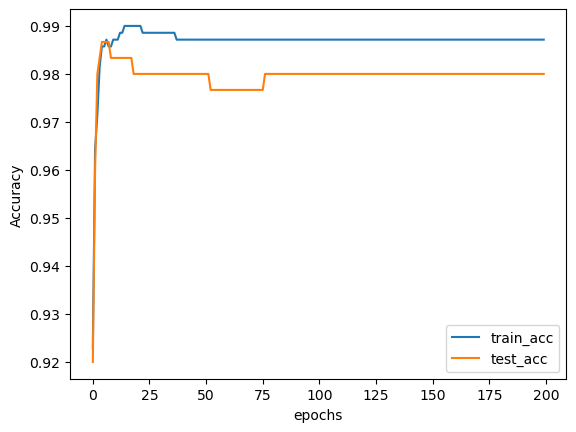

In [36]:
# 观察计算结果
plt.plot(list(range(num_epoch)), np.array(train_acc).flatten(), label='train_acc')
plt.plot(list(range(num_epoch)), np.array(test_acc).flatten(), label='test_acc')
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.legend(loc = 4)

### 逻辑回归的分类性能瓶颈与算法评价

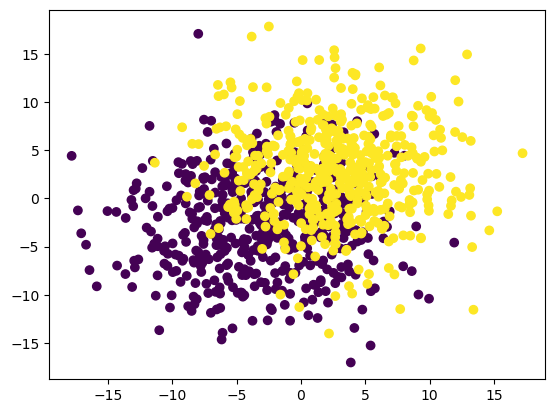

In [37]:
# 设置随机数种子
np.random.seed(24)

# 创建数据
# 离散程度较大
f, l = arrayGenCla(num_class = 2, deg_dispersion = [6, 5], bias = True)

# 绘图展示
plt.scatter(f[:, 0], f[:, 1], c = l)

In [38]:
# 设置随机数种子
np.random.seed(24)

# 数据切分与归一化
Xtrain, Xtest, ytrain, ytest = array_split(f, l)

mean_ = Xtrain[:, :-1].mean(axis=0)
std_ = Xtrain[:, :-1].std(axis=0)

Xtrain[:, :-1] = (Xtrain[:, :-1] - mean_) / std_
Xtest[:, :-1] = (Xtest[:, :-1] - mean_) / std_

In [39]:
# 设置随机数种子
np.random.seed(24)

# 核心参数
batch_size = 50
num_epoch = 200
lr_init = 0.2

# 参数初始值
n = f.shape[1]
w = np.random.randn(n, 1)

# 记录迭代过程模型准确率计算结果
train_acc = []
test_acc = []

for i in range(num_epoch):
    w = sgd_cal(Xtrain, w, ytrain, logit_gd, batch_size=batch_size, epoch=1, lr=lr_init*lr_lambda(i))
    train_acc.append(logit_acc(Xtrain, w, ytrain, thr=0.5))
    test_acc.append(logit_acc(Xtest, w, ytest, thr=0.5))

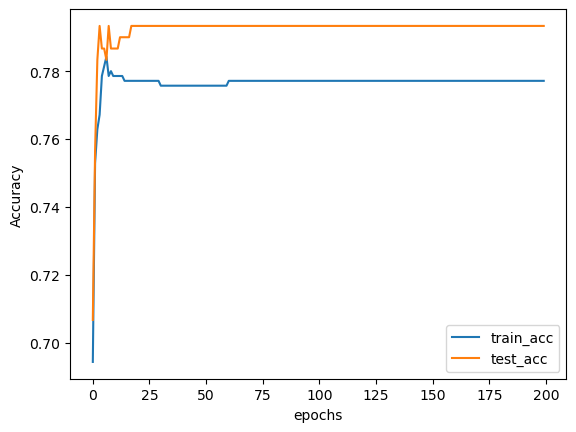

In [40]:
# 观察计算结果
plt.plot(list(range(num_epoch)), np.array(train_acc).flatten(), label='train_acc')
plt.plot(list(range(num_epoch)), np.array(test_acc).flatten(), label='test_acc')
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.legend(loc = 4)